#  Étape	1	:	Préparation	de	l'environnement	

In [1]:
! pip install tensorflow


  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl (385.0 MB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\siham\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


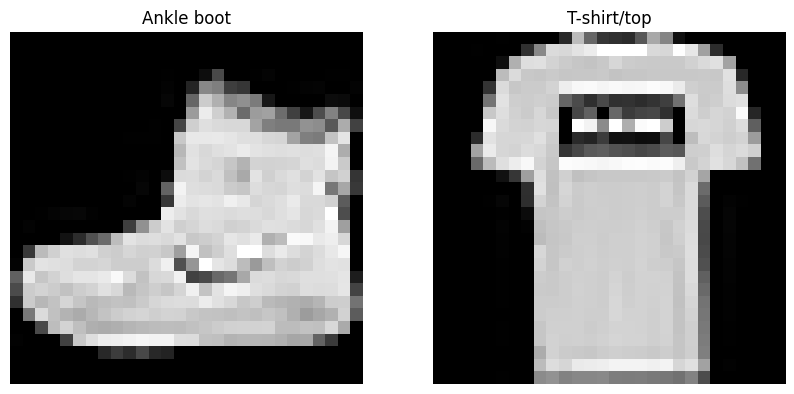

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Charger le dataset Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Afficher les dimensions des ensembles d'entraînement et de test
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Définir les étiquettes des classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Fonction pour afficher un ensemble d'images
def plot_images(images, labels, class_names, num_images=2):
    plt.figure(figsize=(10, 20))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Afficher les premières 10 images avec leurs étiquettes
plot_images(train_images, train_labels, class_names, num_images=2)


# Étape	2	:	Chargement	du	dataset	et	normalisation	


       Chargement du	dataset Fashion-MNIST

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


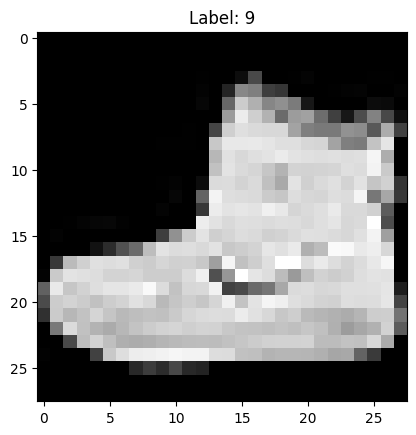

In [4]:
# Charger le dataset Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Afficher les dimensions des ensembles d'entraînement et de test
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Afficher une image pour vérifier le chargement
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()



        Normalisation	des	images

In [5]:
# Normalisation des images (valeurs de pixels entre 0 et 1)
train_images = train_images / 255.0
test_images = test_images / 255.0
# Cette étape de normalisation est importante pour assurer une meilleure convergence des modèles d'apprentissage automatique.

        Affichage	d'une	image	du	dataset.	

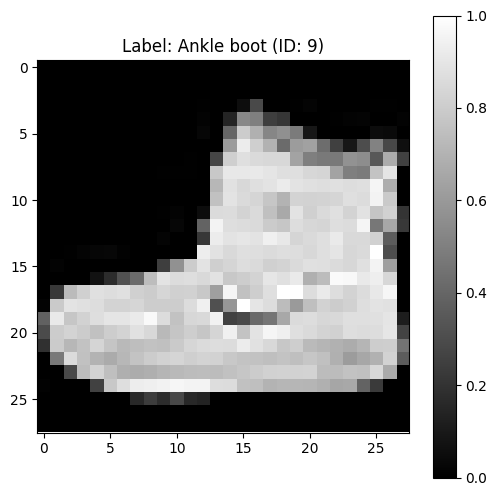

In [6]:
# Liste des étiquettes correspondant aux classes
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Afficher une image et son étiquette
def plot_image(image, label):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Label: {class_names[label]} (ID: {label})")
    plt.show()

# Afficher une image et son étiquette de l'ensemble d'entraînement
plot_image(train_images[0], train_labels[0])

Identifier l'étiquette associée :
Étiquette numérique : L'étiquette associée est un nombre entier entre 0 et 9, représentant la classe de l'image.
Conversion en nom de classe : En utilisant class_names[label], tu convertis l'étiquette numérique en une description lisible. Par exemple, si l'étiquette est 5, class_names[5] te donnera 'Sandal'.

# Étape	3	:	Création	du	modèle	CNN	


In [7]:
import tensorflow as tf

# Charger le dataset Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Redimensionner les images pour ajouter un canal
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normaliser les images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Afficher les dimensions des images redimensionnées
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Définir le modèle CNN
model = models.Sequential([
    # Première couche de convolution
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Deuxième couche de convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Troisième couche de convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Aplatir les données avant la couche dense
    layers.Flatten(),
    
    # Couche dense
    layers.Dense(64, activation='relu'),
    
    # Couche de sortie
    layers.Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Étape 4 : Entraînement du modèle


1. Entraînement du modèle :
Avant de commencer l'entraînement, assurez-vous que le modèle CNN est correctement défini et compilé. Pour cet exemple, je vais entraîner le modèle que nous avons construit plus tôt.

Voici les principaux paramètres que vous devez définir lors de l'entraînement du modèle :

epochs : Nombre d'itérations à travers l'ensemble des données. Ici, on choisit 10 epochs.
batch_size : Nombre d'exemples utilisés pour chaque mise à jour des paramètres. On peut utiliser 32.
validation_split : Fraction des données d'entraînement utilisée comme ensemble de validation pour vérifier les performances pendant l'entraînement (ici 20 %).
Voici comment vous pouvez entraîner le modèle :

In [9]:
# Entraînement du modèle CNN
history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7289 - loss: 0.7439 - val_accuracy: 0.8608 - val_loss: 0.3837
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8677 - loss: 0.3621 - val_accuracy: 0.8815 - val_loss: 0.3295
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8919 - loss: 0.2964 - val_accuracy: 0.8934 - val_loss: 0.2925
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9047 - loss: 0.2627 - val_accuracy: 0.8932 - val_loss: 0.2926
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9150 - loss: 0.2316 - val_accuracy: 0.9046 - val_loss: 0.2648
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9191 - loss: 0.2152 - val_accuracy: 0.9069 - val_loss: 0.2600
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9289 - loss: 0.1917 - val_accuracy: 0.9045 - val_loss: 0.2619
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9343 - loss: 0.1743 -

2. Évaluation du modèle :


In [10]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Précision sur l'ensemble de test : {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9029 - loss: 0.3058
Précision sur l'ensemble de test : 90.67%


Précision de 90.67 % : Cela signifie que votre modèle classe correctement plus de 90 % des images de l'ensemble de test. C'est un bon indicateur que votre modèle a appris à reconnaître les différentes catégories d'articles de mode (chaussures, vêtements, etc.) de manière efficace.
Perte de 0.3058 : La fonction de perte reflète l'erreur moyenne du modèle. Une perte plus faible est généralement associée à de meilleures performances.

# Étape 5 : Visualisation des prédictions


In [11]:
# Prédictions sur les données de test
predictions = model.predict(test_images)

# Obtenir la classe prédite (l'indice avec la probabilité la plus élevée)
predicted_classes = tf.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


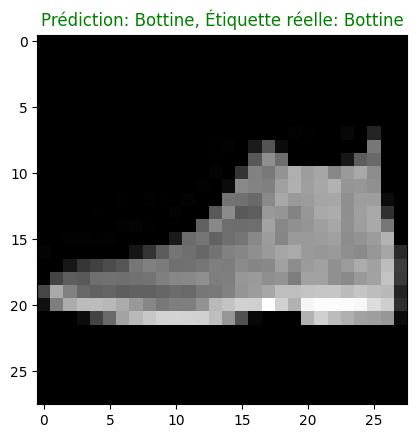

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Dictionnaire des étiquettes du dataset Fashion-MNIST
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau', 
               'Sandale', 'Chemise', 'Baskets', 'Sac', 'Bottine']

def afficher_image_prediction(index):
    # Afficher l'image
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    
    # Obtenir l'étiquette réelle et la prédiction
    true_label = test_labels[index]
    predicted_label = predicted_classes[index]
    
    # Afficher le titre avec la prédiction et l'étiquette réelle
    plt.title(f"Prédiction: {class_names[predicted_label]}, Étiquette réelle: {class_names[true_label]}")
    
    # Colorer le titre en rouge si la prédiction est incorrecte, sinon en vert
    if predicted_label != true_label:
        plt.title(f"Prédiction: {class_names[predicted_label]}, Étiquette réelle: {class_names[true_label]}", color='red')
    else:
        plt.title(f"Prédiction: {class_names[predicted_label]}, Étiquette réelle: {class_names[true_label]}", color='green')
    
    plt.show()

# Affichage d'une image aléatoire et sa prédiction
afficher_image_prediction(0)


Affichage des résultats pour plusieurs images :


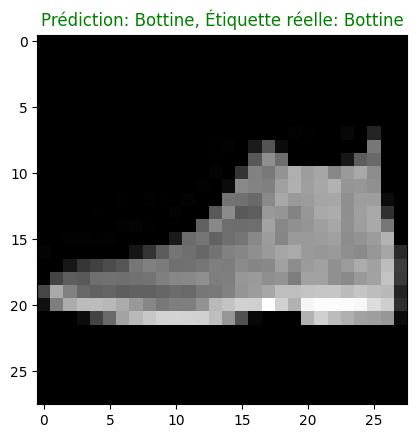

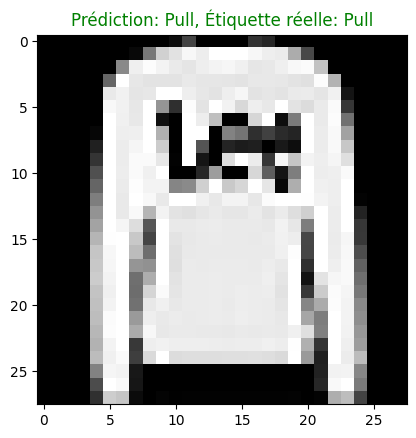

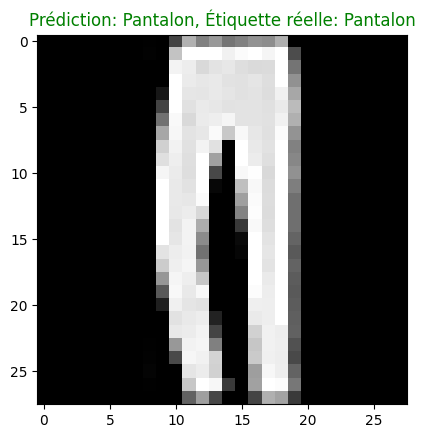

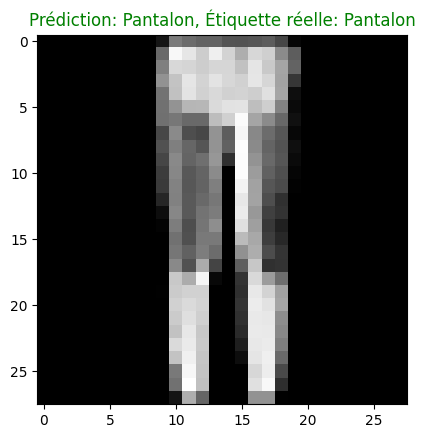

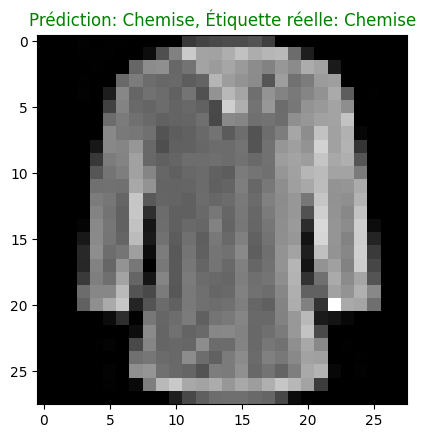

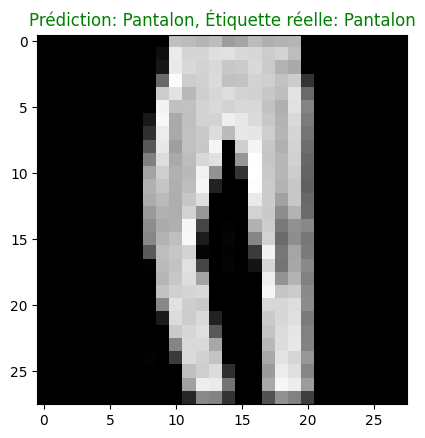

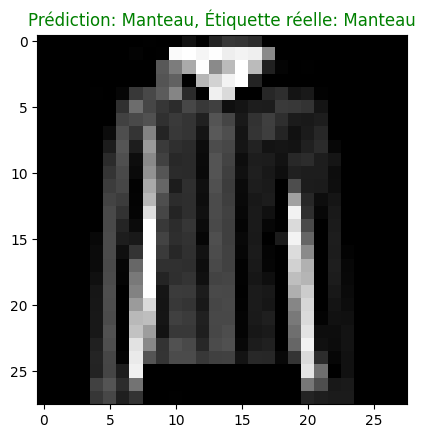

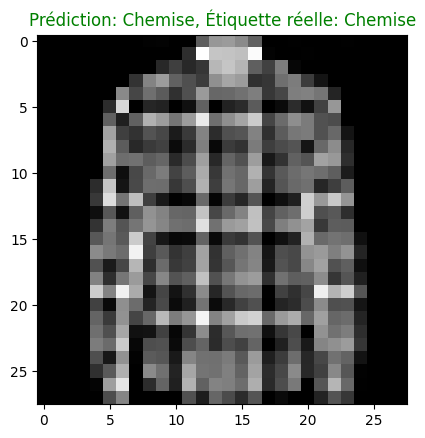

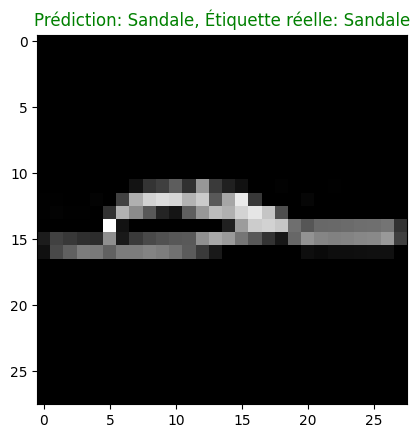

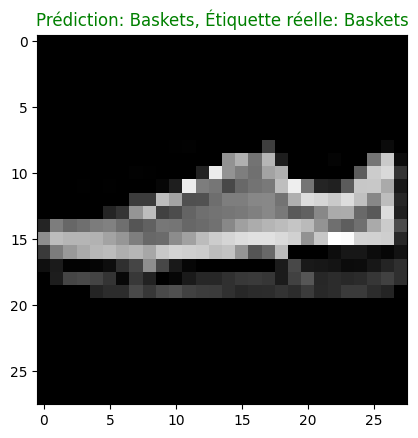

In [13]:
# Afficher plusieurs images et leurs prédictions
for i in range(10):
    afficher_image_prediction(i)
